<a href="https://colab.research.google.com/github/Pinokcio/ML_Study/blob/main/practice/MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch
!pip3 install torchvision

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor
import torchvision.utils as vutils
%matplotlib inline
import matplotlib.pyplot as plt

def show_imgs(x, new_fig=True):
    grid = vutils.make_grid(x.detach().cpu(), nrow=8, normalize=True, pad_value=0.3)
    grid = grid.transpose(0,2).transpose(0,1) # channels as last dimension
    if new_fig:
        plt.figure()
    plt.imshow(grid.numpy())

device = "cuda" if torch.cuda.is_available() else "cpu"

train_ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform=ToTensor(),
)
test_ds = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = False,
    transform=ToTensor(),
)
batch_size = 64
trainDL = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
testDL = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
class Discriminator(nn.Module):
    def __init__(self) -> None:
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input: channels * image size * image size.
            nn.Linear(1 * 28 * 28, 512, bias=True),
            nn.LeakyReLU(0.2, True),
            nn.Linear(512, 256, bias=True),
            nn.LeakyReLU(0.2, True),
            nn.Linear(256, 1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x: Tensor) -> Tensor:
        out = torch.flatten(x, 1)
        out = self.main(out)

        return out


class Generator(nn.Module):
    def __init__(self) -> None:
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 128, bias=True),
            nn.LeakyReLU(0.2, True),

            nn.Linear(128, 256, bias=False),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, True),

            nn.Linear(256, 512, bias=False),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, True),

            nn.Linear(512, 1024, bias=False),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, True),

            # Output: channels * image size * image size.
            nn.Linear(1024, 1 * 28 * 28, bias=True),
            nn.Tanh()
        )

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)

    # Support PyTorch.script function.
    def _forward_impl(self, x: Tensor) -> Tensor:
        out = self.main(x)
        out = out.reshape(out.size(0), 1, 28, 28)

        return out

In [4]:
D = Discriminator()
print(D)
G = Generator()
print(G)

optimD = optim.SGD(D.parameters(), lr = 1e-3)
optimG = optim.SGD(G.parameters(), lr = 1e-3)

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
Generator(
  (main): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=False)
    (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=256, out_features=512, bias=False)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=512, out_features=1024, bias=False)
    (9): BatchNorm1d(102

e0.i0/938 last mb D(x)=0.5089 D(G(z))=0.5119
e0.i100/938 last mb D(x)=0.5562 D(G(z))=0.5056
e0.i200/938 last mb D(x)=0.6130 D(G(z))=0.4981
e0.i300/938 last mb D(x)=0.6666 D(G(z))=0.4899
e0.i400/938 last mb D(x)=0.7093 D(G(z))=0.4852
e0.i500/938 last mb D(x)=0.7509 D(G(z))=0.4831
e0.i600/938 last mb D(x)=0.7990 D(G(z))=0.4872
e0.i700/938 last mb D(x)=0.8201 D(G(z))=0.5002
e0.i800/938 last mb D(x)=0.7990 D(G(z))=0.5154
e0.i900/938 last mb D(x)=0.7750 D(G(z))=0.5228
e1.i0/938 last mb D(x)=0.7886 D(G(z))=0.5255
e1.i100/938 last mb D(x)=0.7581 D(G(z))=0.5241
e1.i200/938 last mb D(x)=0.7209 D(G(z))=0.5219
e1.i300/938 last mb D(x)=0.7154 D(G(z))=0.5182
e1.i400/938 last mb D(x)=0.6406 D(G(z))=0.5126
e1.i500/938 last mb D(x)=0.6242 D(G(z))=0.5090
e1.i600/938 last mb D(x)=0.5935 D(G(z))=0.5014
e1.i700/938 last mb D(x)=0.6061 D(G(z))=0.4935
e1.i800/938 last mb D(x)=0.5760 D(G(z))=0.4872
e1.i900/938 last mb D(x)=0.5563 D(G(z))=0.4818
e2.i0/938 last mb D(x)=0.5759 D(G(z))=0.4808
e2.i100/938 last mb

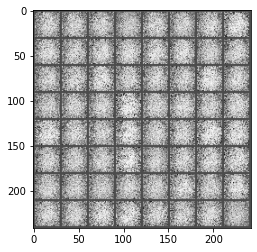

In [5]:
D = D.to(device)
G = G.to(device)

criterion_bce = nn.BCELoss()

lab_real = torch.ones(64, 1, device=device)
lab_fake = torch.zeros(64, 1, device=device)

collect_x_gen = []
fixed_noise = torch.randn(64, 100, device=device)
fig = plt.figure() # keep updating this one
plt.ion()

for epoch in range(3): # 10 epochs
    for i, data in enumerate(trainDL, 0):
        x_real, _ = iter(trainDL).next()
        x_real = x_real.to(device)
        optimD.zero_grad()

        D_x = D(x_real)
        lossD_real = criterion_bce(D_x, lab_real) #실제 데이터

        z = torch.randn(64, 100, device=device) # random noise, 64 samples, z_dim=100
        x_gen = G(z).detach() #G로부터 생성된 sample은 forward만 진행
        
        D_G_z = D(x_gen)
        lossD_fake = criterion_bce(D_G_z, lab_fake) #Generator가 random noise로부터 생성한 데이터

        lossD = lossD_real + lossD_fake #실제 데이터와 페이크 데이터의 loss 합
        lossD.backward()
        optimD.step()
        
        optimG.zero_grad()

        z = torch.randn(64, 100, device=device) # random noise, 64 samples, z_dim=100
        x_gen = G(z)
        D_G_z = D(x_gen)
        lossG = criterion_bce(D_G_z, lab_real) # -log D(G(z)), 실제 데이터와 생성한 데이터의 loss

        lossG.backward()
        optimG.step()
        if i % 100 == 0:
            x_gen = G(fixed_noise)
            show_imgs(x_gen, new_fig=False)
            fig.canvas.draw()
            print('e{}.i{}/{} last mb D(x)={:.4f} D(G(z))={:.4f}'.format(
                epoch, i, len(trainDL), D_x.mean().item(), D_G_z.mean().item()))
    # End of epoch
    x_gen = G(fixed_noise)
    collect_x_gen.append(x_gen.detach().clone())